<h1>Importing Required Libraries</h1>

In [72]:
# Importing Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<h1>Path for Dataset </h1>

In [73]:
# Path for dataset
path=r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\HeartDisease.csv'

<h1> Loading Dataset</h1>

In [74]:
# Loading Dataset
df=pd.read_csv(path)
print("Dataset:\n",df.head(10))

Dataset:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0

<h1>Histogram </h1>

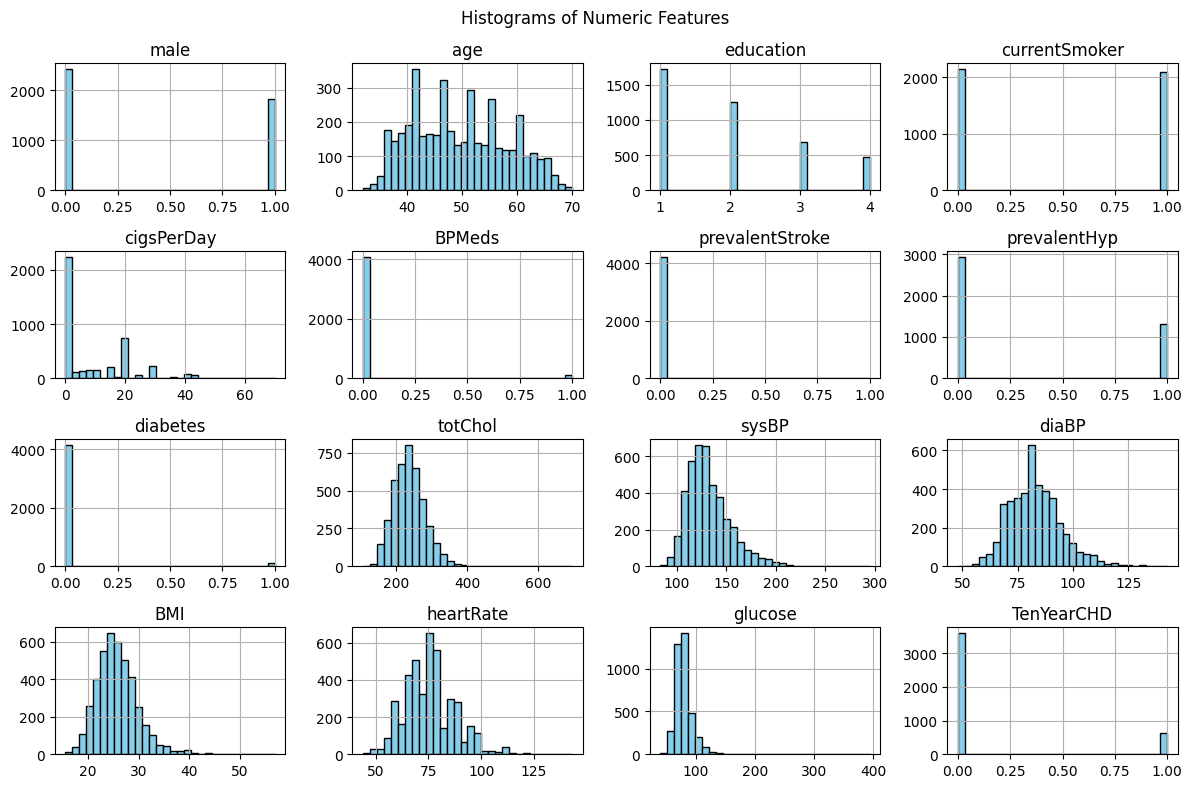

In [75]:
# Histogram for numeric features
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

<h1> Box Plot For Detecting Outliers</h1>

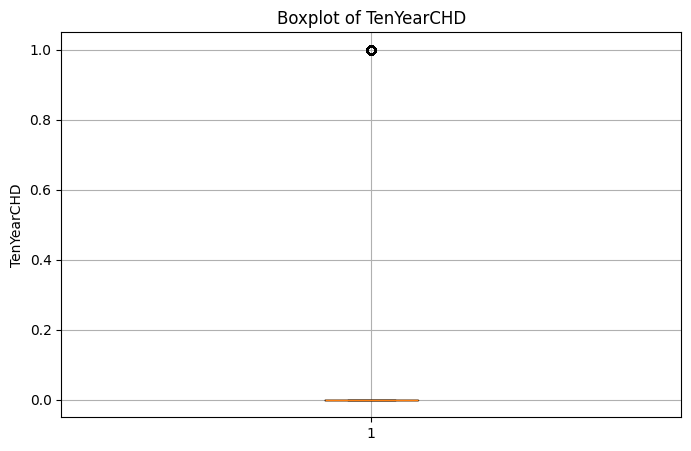

In [76]:
# Box Plot fordetection for detectiong  outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['TenYearCHD'])
plt.title('Boxplot of TenYearCHD')
plt.ylabel('TenYearCHD')
plt.grid(True)
plt.show()

<h1> Data Preprocessing</h1>

In [77]:
# Show total missing values per column
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0        

In [78]:
# Remove rows with any missing values
df = df.dropna()
df = df.fillna(df.mean(numeric_only=True))

In [79]:
# Duplicate rows
print(df[df.duplicated()])
df = df.drop_duplicates()

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [80]:
# Handle missing values (drop rows with NA)
df.dropna(inplace=True)

In [81]:
#Reset indexing after cleaning
df = df.reset_index(drop=True)

In [82]:
print("Preprocessed Dataset : \n",df.head(30))

Preprocessed Dataset : 
     male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   46        3.0              1        23.0     0.0                0   
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
7      0   45        2.0              1        20.0     0.0                0   
8      1   52        1.0              0         0.0     0.0                0   
9      1   43        1.0              1        30.0     0.0                0   
10     0   50        1.0              0         0.0     0.0                0   
11     0   43  

In [83]:
# number of Rows and Columns
rows,cols=df.shape
print("Rows : ",rows)
print("Columns : ",cols)

Rows :  3656
Columns :  16


<h1>Heat Map </h1>

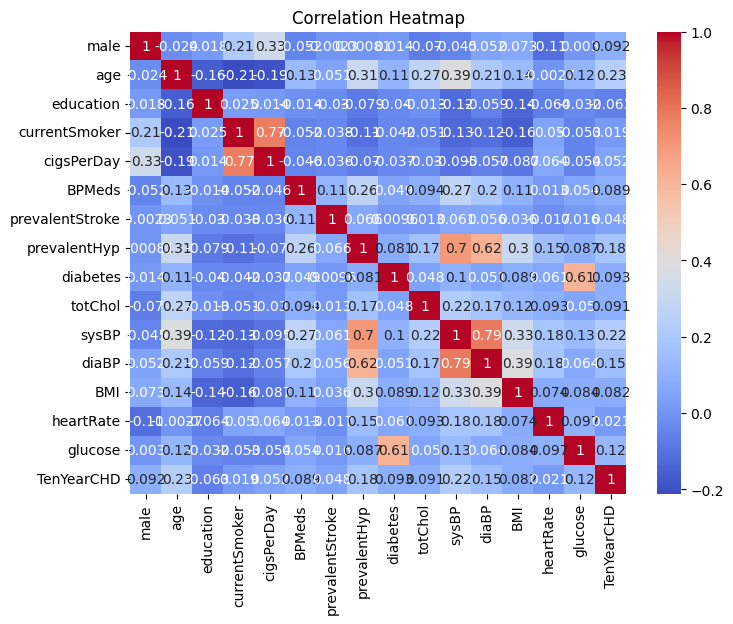

In [84]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h1> Splitting Dataset for features and target</h1>

In [85]:
# Splitting data into X & Y
X=df.drop("TenYearCHD",axis=1)
Y=df['TenYearCHD']

print("X:\n",X)
print("Y:\n",Y)

X:
       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
3651     1   58        3.0              0         0.0     0.0   
3652     1   68        1.0              0         0.0     0.0   
3653     1   50        1.0              1         1.0     0.0   
3654     1   51        3.0              1        43.0     0.0   
3655     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  1

<h1> Splitting Dataset for Training and Testing</h1>

In [86]:
# Splitting data for Training and Testing
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3)

<h1>Loading Logistic Regression model with different variants of Gradient Descent </h1>

In [87]:
# Logistic Regression with gradient descent (default solver: 'lbfgs')
model1 = LogisticRegression(solver='saga')
model2 = LogisticRegression(solver='lbfgs')
model3 = LogisticRegression(solver='liblinear')

<h1> Training Model</h1>

In [88]:
# Training Model
model1.fit(X_Train,Y_Train)
model2.fit(X_Train,Y_Train)
model3.fit(X_Train,Y_Train)

C:\Users\Doctor Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Doctor Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(solver='liblinear')

<h1> Making Predictions for Testing</h1>

In [89]:
# Making Prediction for Testing
Y_Predict1=model1.predict(X_Test)
Y_Predict2=model2.predict(X_Test)
Y_Predict3=model3.predict(X_Test)

<h1>Evaluating Model </h1>

In [90]:
# Evaluationg Model
accuracy1 = accuracy_score(Y_Test, Y_Predict1)
print("Model 1 Accuracy : ",accuracy1)

accuracy2 = accuracy_score(Y_Test, Y_Predict2)
print("Model 2 Accuracy : ",accuracy2)

accuracy3 = accuracy_score(Y_Test, Y_Predict3)
print("Model 3 Accuracy : ",accuracy3)

Model 1 Accuracy :  0.837739288969918
Model 2 Accuracy :  0.8368277119416591
Model 3 Accuracy :  0.8413855970829535


<h1>Scatter Plot between Actual & Predicted TenYearCHD</h1>

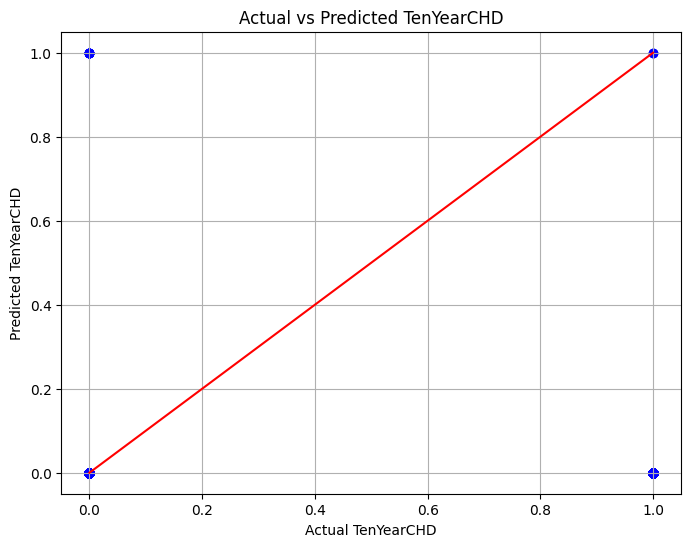

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_Test, Y_Predict, color='blue')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color='red', linestyle='-')
plt.xlabel('Actual TenYearCHD')
plt.ylabel('Predicted TenYearCHD')
plt.title('Actual vs Predicted TenYearCHD')
plt.grid(True)
plt.show()

<h1>Saving Model</h1>

In [94]:
joblib.dump(model3, r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Logistic_Model.pkl')
print(">>>Model is saved successfully<<<")

>>>Model is saved successfully<<<


<h1>Loading Model</h1>

In [95]:
#Loaded_Model = joblib.load(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Logistic_Model.pkl')